In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image

from keras.preprocessing import image
from skimage.io import imread
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import cv2

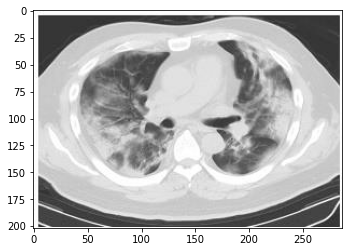

In [3]:
img = image.load_img("F:\\dlk_data\\COVID AND NOT COVID\\dataset\\covid\\2020.02.10.20021584-p6-52%10.png")
plt.imshow(img)

In [4]:
cv2.imread("F:\\dlk_data\\COVID AND NOT COVID\\dataset\\covid\\2020.02.10.20021584-p6-52%10.png").shape

(202, 287, 3)

In [18]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (140,180,3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2),padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(128, (2, 2),padding='valid')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2),strides=(1,1))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.1)) 

model.add(Dense(3)) 
model.add(Activation('sigmoid'))



model.compile(loss ='SparseCategoricalCrossentropy', optimizer ='rmsprop',metrics =['accuracy'])

In [19]:
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

In [20]:
image_height = 140
image_width = 180
batch_size = 8

In [21]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
"F:\\dlk_data\\COVID AND NOT COVID\\dataset",labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size, 
    image_size = (image_height,image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "training"
)

Found 744 files belonging to 2 classes.
Using 670 files for training.


In [22]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
"F:\\dlk_data\\COVID AND NOT COVID\\dataset",labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size, 
    image_size = (image_height,image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "validation"
)

Found 744 files belonging to 2 classes.
Using 74 files for validation.


In [23]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta = 0.01)
    return image,y

In [24]:
ds_train = ds_train.map(augment)

In [25]:
ds_train

<MapDataset shapes: ((None, 140, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [26]:
history = model.fit(ds_train,steps_per_epoch = len(ds_train),
                         epochs = 10,validation_data = ds_test, 
                            validation_steps = len(ds_test))

Epoch 1/10
84/84 [==============================] - 29s 331ms/step - loss: 143.5372 - accuracy: 0.6119 - val_loss: 0.6719 - val_accuracy: 0.7432
Epoch 2/10
84/84 [==============================] - 27s 322ms/step - loss: 3.0467 - accuracy: 0.7239 - val_loss: 75.3605 - val_accuracy: 0.4595
Epoch 3/10
84/84 [==============================] - 27s 322ms/step - loss: 7.7749 - accuracy: 0.7284 - val_loss: 0.6585 - val_accuracy: 0.7432
Epoch 4/10
84/84 [==============================] - 27s 322ms/step - loss: 6.3884 - accuracy: 0.7716 - val_loss: 0.5630 - val_accuracy: 0.7162
Epoch 5/10
84/84 [==============================] - 27s 322ms/step - loss: 6.7177 - accuracy: 0.6731 - val_loss: 0.5681 - val_accuracy: 0.7297
Epoch 6/10
84/84 [==============================] - 28s 336ms/step - loss: 1.8132 - accuracy: 0.6493 - val_loss: 0.6608 - val_accuracy: 0.6622
Epoch 7/10
84/84 [==============================] - 25s 300ms/step - loss: 0.6302 - accuracy: 0.7209 - val_loss: 0.7655 - val_accuracy: 0.7

In [29]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(140,180,3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))
 
model.layers[-6].trainable = False

model.compile(loss ='SparseCategoricalCrossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 5, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 10240)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1310848   
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 16,038,212
Trainable params: 1,323,524
Non-trainable params: 14,714,688
__________________________________

In [30]:
history = model.fit(ds_train,steps_per_epoch = len(ds_train),
                         epochs = 10,validation_data = ds_test, 
                            validation_steps = len(ds_test))

Epoch 1/10
84/84 [==============================] - 83s 987ms/step - loss: 4.3630 - accuracy: 0.5940 - val_loss: 0.6036 - val_accuracy: 0.7838
Epoch 2/10
84/84 [==============================] - 83s 985ms/step - loss: 1.0893 - accuracy: 0.7269 - val_loss: 0.8808 - val_accuracy: 0.7297
Epoch 3/10
84/84 [==============================] - 83s 986ms/step - loss: 0.7488 - accuracy: 0.8224 - val_loss: 0.8724 - val_accuracy: 0.8108
Epoch 4/10
84/84 [==============================] - 91s 1s/step - loss: 0.6035 - accuracy: 0.8642 - val_loss: 1.3658 - val_accuracy: 0.6486
Epoch 5/10
84/84 [==============================] - 90s 1s/step - loss: 0.4404 - accuracy: 0.8746 - val_loss: 0.9179 - val_accuracy: 0.8243
Epoch 6/10
84/84 [==============================] - 84s 1s/step - loss: 0.2484 - accuracy: 0.9433 - val_loss: 1.3870 - val_accuracy: 0.7973
Epoch 7/10
84/84 [==============================] - 83s 986ms/step - loss: 0.2107 - accuracy: 0.9567 - val_loss: 1.4413 - val_accuracy: 0.8378
Epoch 8/

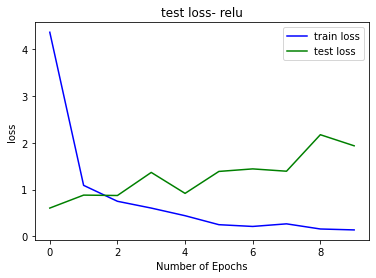

In [31]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="train loss")
plt.plot(history.history['val_loss'], color='g', label="test loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

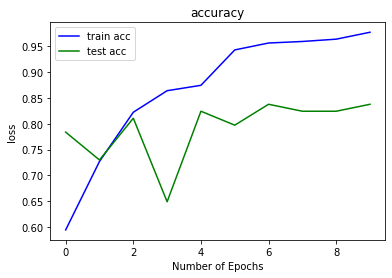

In [41]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='b', label="train acc")
plt.plot(history.history['val_accuracy'], color='g', label="test acc")
plt.title("accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [35]:
test_image = image.load_img('F:\\dlk_data\\COVID AND NOT COVID\\covid.png',
                            target_size = (140,180,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('covid')
elif result[0][1]==1:
    print('not covid')

covid


In [40]:
test_image = image.load_img('F:\\dlk_data\\COVID AND NOT COVID\\not_covid.jpg',
                            target_size = (140,180,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('covid')
elif result[0][1]==1:
    print('not covid')

not covid
